In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install nltk
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=9b24e0ec51446c33cc59de5725f26b9db702b85a2649b33352e4dfbbc39a05e2
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import spacy
from pygments.token import Text
import difflib
import itertools
import re
import warnings
#pip install emoji
#nltk.download('stopwords')
#import emoji
import nltk
nltk.download('stopwords')
#from nltk.stem.snowball import FrenchStemmer
from nltk.stem.porter import PorterStemmer
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
import sys
from nltk.corpus import wordnet as wn
import gensim
from gensim import corpora, models
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
#import gensim
import pprint
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
stop_words = stopwords.words('english')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Utils Functions


In [3]:

# English and french punctuations
PUNCTUATIONS = '''!()-[]{};:'"\\,–+<>./?@#$€£₭฿¥%^&*_~'''

#list of french stop words
STOPWORDS =  nltk.corpus.stopwords.words("english")
print(STOPWORDS)


# you can choose to keep basic emoticons in your text if you think it will help in your classification training
emoji_pattern = re.compile("["
                           #  u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f932"
                           u"\u200f"
                           u"\U0001F914"
                           u"\U0001F923"
                           u"\u200D"
                           u"\u202c"
                           u"\u2069"
                           u"\u2066"
                           u"\U0001F926"
                           u"\U0001F917"
                           u"\U0001f928"
                           u"\t"
                           u"\u200e"
                           "]+", flags=re.UNICODE)



def remove_urls(text):
    # Remove any string that starts with either http:// , https:// , ftp:// or www. plus
    # any combination of non white space characters.
    text = re.sub('http[s]?://\S+', '', text, flags=re.MULTILINE)
    text = re.sub('ftp?://\S+', '', text, flags=re.MULTILINE)
    text = re.sub('www.\S+', '', text, flags=re.MULTILINE)
    return text


#from a string from a list of tokens
def join_tokens(tokens=[], sep=" "):
    return sep.join(tokens)

#remove emojis from a string
def remove_emoji(text):
    return emoji_pattern.sub(r' ', text)

#remove punctuations from the string
def remove_punctuations(text):
    translator = str.maketrans('', '', PUNCTUATIONS)
    return text.translate(translator)
def remove_punctuations_1(text):
  for char in PUNCTUATIONS:
    translator= str.maketrans(char,' ')
    text=text.translate(translator)
  return text

def remove_tab_newlines(text):
  return re.sub('\s+',' ',text)

def replace_char(char, sub,text):
  return text.replace(char,sub) 

def remove_token(token, text):
  Text= ' '.join(i for i in text.split() if i!="rs")
  return Text

def join_tokens(tokens, sep=" "):
     return sep.join(tokens)

def remove_stopwords_from_tokens(tokens):
    return join_tokens([i for i in tokens if i.lower() not in STOPWORDS],' ')

# if a token is a number it is removed from the list of tokens
def remove_digits(text):
    text = join_tokens([w for w in text.split(" ") if not w.isdigit()])
    return text

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  



# remove any digit in the text
def remove_all_numbers(text):
    return re.sub(r'\d+', ' ', text)

def lower_case(text):
  text= ' '.join([i.lower() for i in text.split()])
  return text

def remove_extra_whitespaces(text):
    return ' '.join(text.split())


def stem(tokens):
    stems=[]
    #stemmer = FrenchStemmer()
    stemmer= PorterStemmer()
    for item in tokens:
        stems.append(stemmer.stem(item))

    return stems

def lemmatization(text):
  lem=' '.join([token.lemma_ for token in list(nlp(text))])
  return lem

def remove_contrction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def EDA_pre_process(text):
  my= remove_all_numbers(text)
  my= remove_tab_newlines(my)
  my= remove_urls(my)
  my=replace_char('.',' ',my)
  my= replace_char('’', "'",my)
  my=remove_contrction(my)
  # for EDA, the next processing is applied, some preprocessing like in stopwords
  # such as not, are usefule to keep for the meening 
  my= remove_punctuations_1(my)
  my = lower_case(my)
  my= remove_token('rs',my)
  my= remove_extra_whitespaces(my)
  my = remove_stopwords_from_tokens(my.split())
  my= lemmatization(my)
  my= remove_emoji(my)
  return my

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def remove_generic(texts):
    return [[word for word in doc if word not in generic] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def lemmatization_1(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Load Data

In [12]:

wnl=WordNetLemmatizer()

dataf0 = pd.read_excel('/content/drive/MyDrive/Quora_Merged_Data.xlsx',sheet_name='Merged') 
dataf0.rename({'Text':'Answer','Up_Votes':'Up_votes','Num_Replies':'Num_replies','Num_shares':'Num_Shares','Views':'Num_Views'},axis = 1, inplace = True)
dataf1=dataf0.copy()



In [13]:
dataf0.head()

,User,Up_votes,Num_replies,Num_Shares,Num_Views,Answer
0,Faisal Khan,181000,26,64,592000,First…\nMost people have a monthly income. The...
1,Venkatagiri Kulkarni,181000,198,118,6599000,"1.Don’t use credit cards\n- You buy the items,..."
2,Anubhav Jain,39000,72,92,202600,Don't keep all your funds in one bank.\nSpend ...
3,Nishchal Arora,22000,45,32,1456000,"Uninstall Amazon, Flipkart etc. during Diwali ..."
4,Sathish Kumar,21000,39,78,2664000,Hello Readers!!!!\nHope you all doing well.\nT...


# Preprocessing

In [14]:
from zmq.constants import NULL
#apply preprocessing on the data
dataf0['Answer']=dataf0['Answer'].apply(lambda x: EDA_pre_process(x))
# removing these words since they were used in the search on Quora, they appear in almost all the data so they have to be removed
dataf0['Answer']=dataf0['Answer'].apply(lambda x: ' '.join(y for y in x.split() if y not in ['money','save', 'saving','time','way'] ))
#save the output
dataf1['Answer_processed']=dataf0['Answer'].copy()
dataf1.to_excel("Quora_Merged_Data_preprocessed.xlsx")
dataf1=NULL

In [ ]:
dataf0.head()

# Topic Modeling

In [15]:
liste=dataf0['Answer'].tolist()
data_words = list(sent_to_words(liste))

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
#remove generic

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp =spacy.load("en_core_web_sm")# spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization_1(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ'])#, 'VERB', 'ADV'])
data_lemmatized_gen=data_lemmatized

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized_gen)

# Create Corpus
texts = data_lemmatized_gen

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1)]]


In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    num=0
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num)
        num=num+1
    return model_list, coherence_values

In [20]:
# we tested here a diffrent round of number of topics, from 5 topics to 16 topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=16, step=1)

0
1
2
3
4
5
6
7
8
9
10


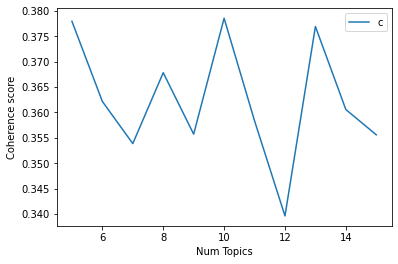

In [21]:
%matplotlib inline
# Show graph
limit=16; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
#best topic is the one with the highest coherence value
optimal_model = model_list[coherence_values.index(max(coherence_values))]
model_topics = optimal_model.show_topics(formatted=False)
pprint.pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.032*"food" + 0.023*"use" + 0.015*"thing" + 0.013*"shopping" + 0.013*"lot" '
  '+ 0.011*"health" + 0.010*"stop" + 0.009*"bill" + 0.009*"buy" + '
  '0.008*"smoke" + 0.008*"people" + 0.007*"energy" + 0.007*"shop" + '
  '0.007*"order" + 0.007*"item" + 0.007*"discount" + 0.007*"year" + '
  '0.006*"burger" + 0.006*"online" + 0.006*"city"'),
 (1,
  '0.027*"year" + 0.025*"day" + 0.020*"fund" + 0.019*"life" + 0.018*"month" + '
  '0.015*"people" + 0.013*"amount" + 0.012*"work" + 0.011*"hour" + 0.010*"job" '
  '+ 0.009*"thing" + 0.009*"college" + 0.009*"interest" + 0.009*"investment" + '
  '0.008*"market" + 0.007*"end" + 0.007*"rupee" + 0.006*"salary" + '
  '0.006*"manager" + 0.006*"today"'),
 (2,
  '0.034*"expense" + 0.024*"plan" + 0.020*"month" + 0.020*"budget" + '
  '0.018*"thing" + 0.018*"help" + 0.017*"use" + 0.017*"goal" + '
  '0.016*"spending" + 0.013*"pay" + 0.013*"amount" + 0.012*"bill" + '
  '0.011*"loan" + 0.010*"purchase" + 0.010*"payment" + 0.010*"income" + '
  '0.010*"cash

# Word Cloud

In [23]:
mante=[ ]
for lis in data_lemmatized:
  mante.append(' '.join([x for x in lis]))
mante1=' '.join([x for x in mante])



In [24]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

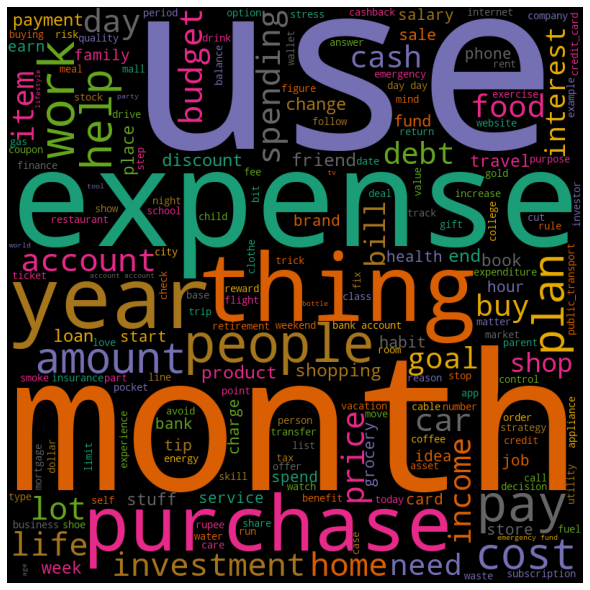

In [25]:

wordcloud = WordCloud(width = 800, height = 800,
                #background_color ='Dark2',
                colormap="Dark2",
                stopwords = '',
                min_font_size = 10).generate(mante1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# Statistics on the DATA

In [26]:
# No Null Values
dataf0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         281 non-null    object
 1   Up_votes     281 non-null    int64 
 2   Num_replies  281 non-null    int64 
 3   Num_Shares   281 non-null    int64 
 4   Num_Views    281 non-null    int64 
 5   Answer       281 non-null    object
dtypes: int64(4), object(2)
memory usage: 13.3+ KB


In [27]:
dataf0.head()

,User,Up_votes,Num_replies,Num_Shares,Num_Views,Answer
0,Faisal Khan,181000,26,64,592000,first … people monthly income pay bill whateve...
1,Venkatagiri Kulkarni,181000,198,118,6599000,use credit card buy item want spend lac credit...
2,Anubhav Jain,39000,72,92,202600,keep fund one bank spend salary deduct amount ...
3,Nishchal Arora,22000,45,32,1456000,uninstall amazon flipkart etc diwali sale new ...
4,Sathish Kumar,21000,39,78,2664000,hello reader hope well today go to write somet...


In [28]:
dataf0.describe()

,Up_votes,Num_replies,Num_Shares,Num_Views
count,281.000000,281.000000,281.000000,2.810000e+02
mean,1865.843416,4.761566,4.861210,1.088770e+05
std,15578.683300,15.501270,13.254054,4.752398e+05
min,1.000000,0.000000,0.000000,1.600000e+01
25%,5.000000,0.000000,0.000000,6.670000e+02
50%,19.000000,0.000000,0.000000,5.800000e+03
75%,77.000000,3.000000,3.000000,4.750000e+04
max,181000.000000,198.000000,118.000000,6.599000e+06


In [29]:
# High Correlation between the metrics
correlations = dataf0[['Up_votes','Num_replies','Num_Shares','Num_Views']].corr()
print(correlations)

             Up_votes  Num_replies  Num_Shares  Num_Views
Up_votes     1.000000     0.672773    0.654941   0.681967
Num_replies  0.672773     1.000000    0.735680   0.835932
Num_Shares   0.654941     0.735680    1.000000   0.675170
Num_Views    0.681967     0.835932    0.675170   1.000000


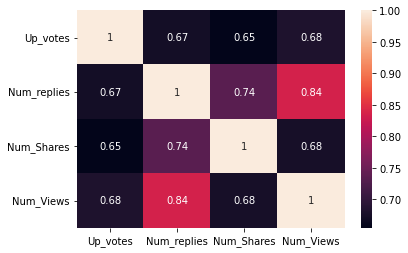

In [30]:
from pandas.core.internals.managers import annotations
import seaborn as sns

sns.heatmap(dataf0.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a39b5dc0>]],
      dtype=object)

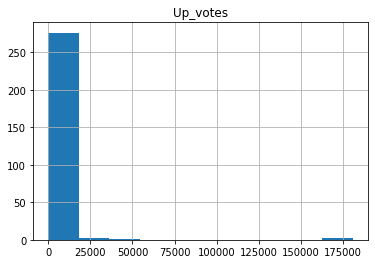

In [31]:
#Distribution of the up_votes,: Few answers have very high upvote value
dataf0.hist(column='Up_votes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a45e7d30>]],
      dtype=object)

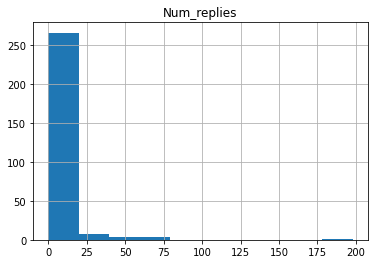

In [32]:
# Most of the answsers have few replies,
dataf0.hist(column='Num_replies')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a3553cd0>]],
      dtype=object)

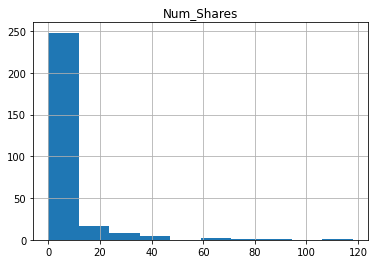

In [33]:
# Few shares are noticed. 
dataf0.hist(column='Num_Shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a4333dc0>]],
      dtype=object)

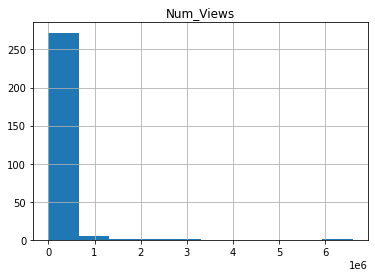

In [34]:
#Same pattern for number of views, . this makes sens since the four metrics are highly correlated
dataf0.hist(column='Num_Views')